# importe e criação da base

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LogisticRegression

from ta import volatility, volume, trend, momentum
from sklearn.metrics import r2_score, accuracy_score, balanced_accuracy_score, confusion_matrix, precision_score

from sklearn.decomposition import PCA

from sklearn.neural_network import MLPClassifier

from invest import Invest

from sklearn.feature_selection import SelectKBest


df = pd.read_csv('bitcoinData.csv', index_col=0)






In [19]:
## filtra as 6 primeira colunas, até a colua Volume
df1 = df.iloc[:, :6].set_index('Open time')
# invest = Invest(df1)

# invest.medias_moveis([5, 10, 15, 20])

# medias = invest.medias

# df1 = df1[df1.index < '2022-01-01']

df1.head(5)

,Open,High,Low,Close,Volume
Open time,,,,,
2017-12-01 00:00:00,9837.00,9900.03,9712.00,9894.96,56.349847
2017-12-01 00:15:00,9894.89,9894.89,9799.00,9800.00,79.466001
2017-12-01 00:30:00,9800.00,9879.95,9741.13,9800.03,49.589463
2017-12-01 00:45:00,9784.99,9785.00,9600.00,9685.00,90.568676
2017-12-01 01:00:00,9685.02,9689.99,9550.00,9617.99,77.231866


# alvo

In [20]:
## direção do candle
df1['candle_dir'] = (df1['Close'] - df1['Open']) / df1['Open']

# descola o valor atual para o futuro, nosso alvo continue
df1['alvo_continuo'] = df1['candle_dir'].shift(-1)

## thresh_holds
buy_thresh = (0.1 / 100) # 
sell_thresh = -(0.1 / 100) # 

# definição do alvo continuo
df1['alvo_binario'] = np.where(df1['alvo_continuo'] >  buy_thresh, 1, 0)
df1['alvo_binario'] = np.where(df1['alvo_continuo'] <  sell_thresh, -1, df1['alvo_binario'])



df1.tail(5)

,Open,High,Low,Close,Volume,candle_dir,alvo_continuo,alvo_binario
Open time,,,,,,,,
2023-09-15 23:00:00,26776.32,26888.00,26752.60,26752.60,882.84481,-0.000886,-0.002911,-1
2023-09-15 23:15:00,26752.60,26760.99,26671.03,26674.72,343.61925,-0.002911,-0.000301,0
2023-09-15 23:30:00,26674.71,26724.17,26666.66,26666.67,311.27685,-0.000301,-0.002500,-1
2023-09-15 23:45:00,26666.66,26669.98,26591.73,26600.00,326.49725,-0.002500,0.000379,0
2023-09-16 00:00:00,26599.99,26643.82,26571.42,26610.07,458.77691,0.000379,NaN,0


In [21]:
df1.tail(10)

,Open,High,Low,Close,Volume,candle_dir,alvo_continuo,alvo_binario
Open time,,,,,,,,
2023-09-15 21:45:00,26454.79,26480.85,26454.79,26469.14,86.19933,0.000542,0.000695,0
2023-09-15 22:00:00,26469.14,26494.80,26469.13,26487.53,157.29776,0.000695,0.000608,0
2023-09-15 22:15:00,26487.52,26507.19,26487.52,26503.63,139.44983,0.000608,0.007879,1
2023-09-15 22:30:00,26503.62,26770.00,26503.62,26712.43,1131.78014,0.007879,0.002391,1
2023-09-15 22:45:00,26712.43,26847.72,26684.87,26776.31,1034.61622,0.002391,-0.000886,0
2023-09-15 23:00:00,26776.32,26888.00,26752.60,26752.60,882.84481,-0.000886,-0.002911,-1
2023-09-15 23:15:00,26752.60,26760.99,26671.03,26674.72,343.61925,-0.002911,-0.000301,0
2023-09-15 23:30:00,26674.71,26724.17,26666.66,26666.67,311.27685,-0.000301,-0.002500,-1
2023-09-15 23:45:00,26666.66,26669.98,26591.73,26600.00,326.49725,-0.002500,0.000379,0


# variaveis


In [22]:
## variaveis de volatidade


retorno = df1['Close'].pct_change()

volatidade_10 = retorno.rolling(10).std() 
rank_vol = volatidade_10.rolling(10).rank()

## pega o avarage true range e dividade pelo close
atr = volatility.average_true_range(df1['High'], df1['Low'], df1['Close'], window=10) / df1['Close']

bbw = volatility.bollinger_wband(df1['Close'], window=10)


drawdown1 = (df1['Close'].cummax() - df1['Close']) / df1['Close'].cummax()

drawdown2 = drawdown1.rolling(10).max()

drawdown_rev = (df1['Close'] - df1['Close'].cummin()) / df1['Close']
drawdown_rev2 = drawdown_rev.rolling(10).max()


In [23]:
## variaveis de momentum

rsi = momentum.rsi(df1['Close'], window=10)
tsi = momentum.tsi(df1['Close'], window_slow=10, window_fast=5)

stoch = momentum.stoch(df1['High'], df1['Low'], df1['Close'])

sma5 = df1['Close'].rolling(5).mean()

rsl = sma5 / df1['Close']

In [24]:
## variaveis e volume

obv = volume.on_balance_volume(df1['Close'], volume=df1['Volume'])
acc_index = volume.acc_dist_index(df1['High'], df1['Low'], df1['Close'], volume=df1['Volume'])

In [25]:
## variaveis de trend

macd = trend.macd(df1['Close'], window_fast=6, window_slow=10) / df1['Close']
adx = trend.adx(df1['High'], df1['Low'], df1['Close'], window=10)
cci = trend.cci(df1['High'], df1['Low'], df1['Close'], window=10)

c:\Users\mathe\AppData\Local\Programs\Python\Python310\lib\site-packages\ta\trend.py:769: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
c:\Users\mathe\AppData\Local\Programs\Python\Python310\lib\site-packages\ta\trend.py:774: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)


In [26]:
## variaveis de "padrão de candlestick"
força = (df1['High'] - df1['Low']) / (df1['Close'] - df1['Open'] + 0.0001)

In [27]:
MAD = lambda x: ((x - x.mean()).abs()).mean()
    

## variaveis estatisticas

skew = retorno.rolling(10).skew()
kurt = retorno.rolling(10).kurt()
std = retorno.rolling(10).std()
mad = retorno.rolling(10).apply(MAD)
zscore = (retorno - retorno.rolling(10).mean()) / std
fat_tail = mad / std

In [28]:
## variaveis misturadas

adx_sma_bull = np.where((adx > 50) & (rsl > 1.01), 1, 0)
adx_sma_bear = np.where((adx > 50) & (rsl < 0.99), 1, 0)

adx_skew_bull = np.where((adx > 50) & (skew > 0.5), 1, 0)
adx_skew_bear = np.where((adx > 50) & (skew < -0.5), 1, 0)

skew_kurt = np.where((kurt > 3) & (skew > 0.5), 1, 0)


# seleção das variaveis (manual)

In [29]:
## volatilidade
df1['vol'] = volatidade_10
df1['rank_vol'] = rank_vol
df1['atr'] = atr
df1['bbw'] = bbw
df1['drawdown1'] = drawdown1
df1['drawdown2'] = drawdown2
df1['dradown_rev'] = drawdown_rev
df1['dradown_rev2'] = drawdown_rev2

## momentum
df1['rsi'] = rsi
df1['tsi'] = tsi
df1['stoch'] = stoch
df1['rsl'] = rsl

## trend
df1['adx'] = adx
df1['MACD'] = macd

## volume
df1['obv'] = obv
df1['acc_index'] = acc_index

## candlestick
df1['força'] = força

## estatistica
df1['mad'] = mad
df1['zscore'] = zscore

## mituradas
df1['adx_sma_bull'] = adx_sma_bull
df1['adx_sma_bear'] = adx_sma_bear
df1['adx_skew_bull'] = adx_skew_bull
df1['adx_skew_bear'] = adx_skew_bear
df1['skew_kurt'] = skew_kurt


df1 = df1.dropna()

# separar em treino / teste

In [30]:
df_x = df1.drop(['alvo_continuo', 'alvo_binario'], axis=1)
df_y = df1[['alvo_binario']]





tamanho_treino = int(df_x.shape[0] * 0.6)


df_x_treino = df_x.iloc[:tamanho_treino]
df_x_teste = df_x.iloc[tamanho_treino:]


df_y_treino = df_y.iloc[:tamanho_treino]
df_y_teste = df_y.iloc[tamanho_treino:]




df_x_teste = df_x_teste[df_x_teste.index < '2023-01-01']
df_y_teste = df_y_teste[df_y_teste.index < '2023-01-01']
df_y_cont = df1['alvo_continuo'].iloc[tamanho_treino:]
df_y_cont = df_y_cont[df_y_cont.index < '2023-01-01']



# PCA, Scalling e feature selection

In [31]:
#PCA
pca = PCA()

pca.fit(df_x_treino, df_y_treino)

df_x_treino = pca.transform(df_x_treino)
df_x_teste = pca.transform(df_x_teste)

df_y_cont = df1[['alvo_continuo']].iloc[tamanho_treino:]

## feature selection
numero_feat = int(df_x_treino.shape[1] * (0.5))
kbest = SelectKBest(k=numero_feat)

kbest.fit(df_x_treino, df_y_treino)


df_x_treino = kbest.transform(df_x_treino)
df_x_teste = kbest.transform(df_x_teste)


c:\Users\mathe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# treino dos modelos

In [32]:
from sklearn.tree import DecisionTreeClassifier

# lr = LogisticRegression()
# lr = DecisionTreeClassifier(max_depth=15, max_leaf_nodes=10)
lr = MLPClassifier(random_state=0)

lr.fit(df_x_treino, df_y_treino)

pred = lr.predict(df_x_teste)

c:\Users\mathe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# performace dos modelos e backteste

In [33]:

r2_score(y_true=df_y_teste, y_pred=pred)

-0.16378305999675913

O maximo drawdown foi de : 38.667441800485676 %


<AxesSubplot:xlabel='Open time'>

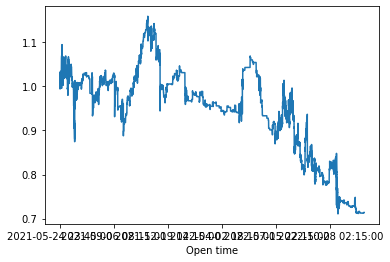

In [34]:
# precision_score(y_true=df_y_teste, y_pred=pred, average='')

alavancagem = 1

df_y_teste['pred'] = pred
df_y_teste['alvo'] = df_y_cont

# df_y_teste['pred'] = np.where(pred == 1, 1, 0)

teste = ((pred * (df_y_teste['alvo'] * alavancagem)) + 1).cumprod()
teste1 = (df_y_cont + 1).cumprod()

drawdown = (teste.cummax() - teste) / teste.cummax()

print("O maximo drawdown foi de :", (drawdown.max() * 100), "%")

teste.plot()
# teste1.plot()
